In [ ]:
# %load_ext autoreload
# %autoreload 2
%reload_ext autoreload

# ---- Make sure Python can find your 'scripts' folder ----
import sys, os
from pathlib import Path
import matplotlib.pyplot as plt
# Start at the current notebook folder and walk up a few levels
here = Path.cwd()
root = here
for _ in range(5):
    if (root / "scripts" / "wrangle.py").exists():
        # Add BOTH the project root and the scripts folder to sys.path
        sys.path.insert(0, str(root))
        sys.path.insert(0, str(root / "scripts"))
        break
    root = root.parent

print("Detected project root:", root)
print("wrangle.py exists:", (root / "scripts" / "wrangle.py").exists())

# import should work
import importlib, scripts.wrangle as wr
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

Detected project root: c:\Users\Okoko\Desktop\DATA ANALYSIS PROJECT\World_quant_university\BuenosAires_Apartment_Project
wrangle.py exists: True


In [ ]:
#import csv
df = wr.wrangle('./../data/buenos-aires-real-estate-1.csv')

c:\Users\Okoko\Desktop\DATA ANALYSIS PROJECT\World_quant_university\BuenosAires_Apartment_Project\scripts\wrangle.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[mask_prop & mask_prop_type & mask_price & mask_size]


In [ ]:
#split dataset into target and feature
X = df[['surface_covered_in_m2']]
y = df['price_aprox_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

y_train.head()

X_train shape: (1074, 1)
y_train shape: (1074,)
X_test shape: (269, 1)
y_test shape: (269,)


4737    122000.0
5566     82000.0
8273    185000.0
8021    141300.0
6090    167000.0
Name: price_aprox_usd, dtype: float64

In [43]:
#baselining
y_mean = y_train.mean()
y_pred_baselining = [y_mean] * len(y_train)
y_pred_baselining[:5]

[135862.29943202977,
 135862.29943202977,
 135862.29943202977,
 135862.29943202977,
 135862.29943202977]

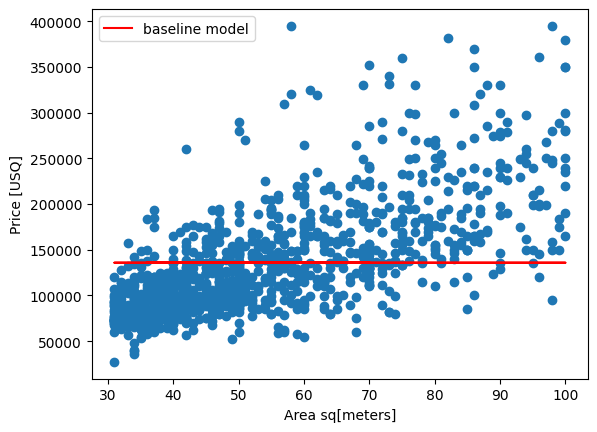

In [44]:
#exploring performance of the baseline model

#baseline model
plt.plot(X_train, y_pred_baselining, color='red', label='baseline model')
plt.scatter(X_train, y_train)
plt.xlabel('Area sq[meters]')
plt.ylabel('Price [USQ]')
plt.legend()

In [45]:
#performance metric of the baseline model using the mean absoulte error
mae_baseline = mean_absolute_error(y_train, y_pred_baselining)
mae_baseline

46458.23326565962

In [46]:
#Iterating
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
#Evaluating model
y_pred_training = model.predict(X_train)

In [48]:
#assessing model performance with the training data
mae_training = mean_absolute_error(y_train, y_pred_training)
mae_training

31710.760370592187

In [60]:
y_pred_test = model.predict(X_test)
y_pred_test[:5]
print(y_test.head())
print(y_pred_test[:5])


5121    105000.0
3264     72000.0
2248     85000.0
2544     90000.0
5647    145000.0
Name: price_aprox_usd, dtype: float64
[108105.55265486 108105.55265486 135561.91557329  96665.40143886
 135561.91557329]


In [64]:
#Extract Intercept and coefficien of model
intercept = model.intercept_
coeff = model.coef_[0]
coeff

2288.030243201727

In [69]:
print('Equation of Linear Model')
print(f"apartment_price = {intercept} + {coeff} * surface_covered") 

Equation of Linear Model
apartment_price = 9720.25219719042 + 2288.030243201727 * surface_covered


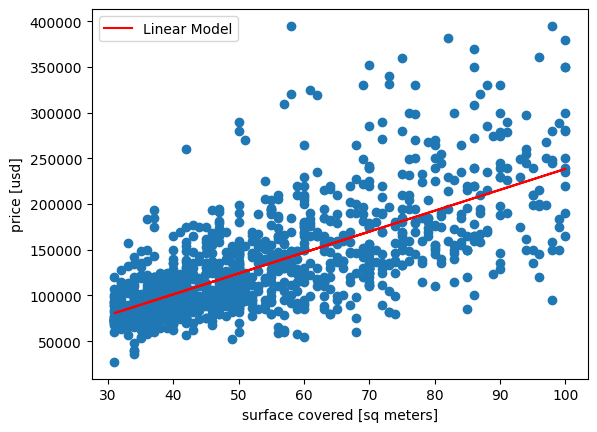

In [68]:
plt.plot(X_train, y_pred_training, color='red', label ='Linear Model')
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();